<a href="https://colab.research.google.com/github/1901010019/DIGIT_RECOGNIZTION_USING_RANDOM_FOREST_CLASSIFIER/blob/main/hand_written_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center><b>IMAGE CLASSIFICATION</b></center><h1>

* we will see, how a traditional machine learning algorithm performs infront of Deep learning algorithms.

* we will use the ensemble method ( RANDOM FOREST CLASSIFIER )

* we will discuss the algorithm.

* finally we will try and build our image classification model.


### **FLOW OF THIS NOTEBOOK**



1.   The Random Forest algorithm.
2.   How does the classifier work.
3.   its advantages and disadvantages.
4.   Finding important features.
5.   comparision between random forest and decision trees.
6.   Building a classifier with scikit-learn.



### **1. The Random Forest algorithm**

for understanding this algorithm, let's take a simple example.

suppose you want to go to a place and you would like to go to a place which you'll really enjoy.

so what do you do to find a place that you will like?

you'll search online, read reviews on travel blogs and portals or you can also ask your friends.

Let’s suppose you have decided to ask your friends, and talked with them about their past travel experience to various places. You will get some recommendations from every friend. Now you have to make a list of those recommended places. Then, you ask them to vote (or select one best place for the trip) from the list of recommended places you made. The place with the highest number of votes will be your final choice for the trip.

In the above decision process, there are two parts. First, asking your friends about their individual travel experience and getting one recommendation out of multiple places they have visited. This part is like using the decision tree algorithm. Here, each friend makes a selection of the places he or she has visited so far.

The second part, after collecting all the recommendations, is the voting procedure for selecting the best place in the list of recommendations. This whole process of getting recommendations from friends and voting on them to find the best place is known as the random forests algorithm.

It technically is an ensemble method (based on the divide-and-conquer approach) of decision trees generated on a randomly split dataset. This collection of decision tree classifiers is also known as the forest. The individual decision trees are generated using an attribute selection indicator such as information gain, gain ratio, and Gini index for each attribute. Each tree depends on an independent random sample. In a classification problem, each tree votes and the most popular class is chosen as the final result. In the case of regression, the average of all the tree outputs is considered as the final result. It is simpler and more powerful compared to the other non-linear classification algorithm.

### **2. How does the classifier work**

It works in four steps:

* Select random samples from a given dataset.
* Construct a decision tree for each sample and get a prediction result from each decision tree.
* Perform a vote for each predicted result.
* Select the prediction result with the most votes as the final prediction.

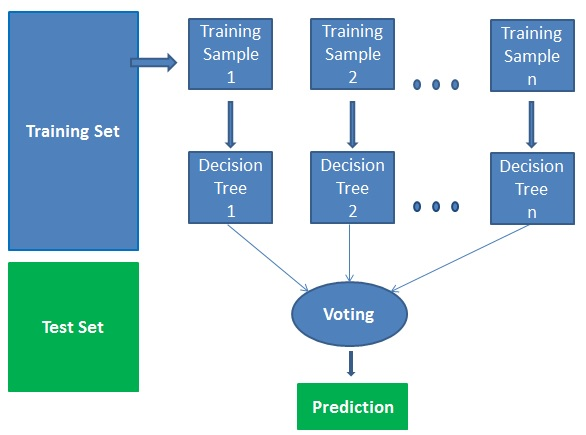


### **3. its advantages and disadvantages.**

**ADVANTAGES** :-

* Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.

* It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.

* The algorithm can be used in both classification and regression problems.

* Random forests can also handle missing values. There are two ways to handle these: using median values to replace continuous variables, and computing the proximity-weighted average of missing values.

* You can get the relative feature importance, which helps in selecting the most contributing features for the classifier.



**DISADVANTAGES** :-

* Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.

* The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree.

### **4. Finding important features**

Random forests also offers a good feature selection indicator. Scikit-learn provides an extra variable with the model, which shows the relative importance or contribution of each feature in the prediction. It automatically computes the relevance score of each feature in the training phase. Then it scales the relevance down so that the sum of all scores is 1.

This score will help you choose the most important features and drop the least important ones for model building.

Random forest uses gini importance or mean decrease in impurity (MDI) to calculate the importance of each feature. Gini importance is also known as the total decrease in node impurity. This is how much the model fit or accuracy decreases when you drop a variable. The larger the decrease, the more significant the variable is. Here, the mean decrease is a significant parameter for variable selection. The Gini index can describe the overall explanatory power of the variables.

### **5. comparision between random forest and decision trees**

* Random forests is a set of multiple decision trees.
* Deep decision trees may suffer from overfitting, but random forests prevents overfitting by creating trees on random subsets.
* Decision trees are computationally faster.
* Random forests is difficult to interpret, while a decision tree is easily interpretable and can be converted to rules.

### **6. Building a classifier with scikit-learn**

we will be building a model on the iris flower dataset, which is a very famous classification set. It comprises the sepal length, sepal width, petal length, petal width, and type of flowers. 

There are three species or classes: setosa, versicolor, and virginia. 

we will build a model to classify the type of flower. The dataset is available in the scikit-learn library or you can download it from the UCI Machine Learning Repository.

In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
# importing the scikit learn dataset library
from sklearn.datasets import fetch_openml

# loading datasets
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [3]:
# let's see the shape of independent and dependent data respectively.
X, y = mnist['data'], mnist['target']
X.shape, y.shape

((70000, 784), (70000,))

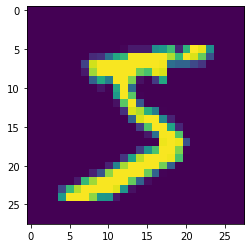

In [4]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image)
plt.show()

In [5]:
# let's see the label corresponding to the first feature vector
y[0]

'5'

In [6]:
y # we can see, all the labels are in string format, we need to type cast it to integer.

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [7]:
# type casting
y = y.astype(np.uint8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

**NOTE**

* MNIST dataset is already shuffled for us, this ensures our model doesnot learn unneccessary patterns.

In [8]:
# splitting the dataset into training and testing set

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### **6.1 BINARY CLASSIFICATION**

In [9]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [10]:
y_test_5

array([False, False, False, ..., False,  True, False])

In [11]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [12]:
# now let's train our model on SGDClassifier from scikit-learn
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
# it correctly predicted the label of 'some_digit'
sgd_clf.predict([some_digit])

array([ True])

for more on cross_val_score, one can visit the documentation.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html


The `cross_val_score()` function will be used to perform the evaluation, taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold.

In [14]:
# now let's measure our accuracy using cross validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

**NOTE**

* Accuracy is not preferred way of model performance when we are dealing with skewed dataset ( when one class is more frequent that the other )

* A much better way to evaluate our models performance is to look at the confusion matrix.

In [15]:
# cross_val_score returns the score, whereas cross_val_predict returns the predicted values directly
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

"""
The prediction that we will get here will be clean, as we have made the prediction over the data that the model has never seen 
before. we shuffled the data and then made prediction with the help of 'cross_val_predict' function.

"""

"\nThe prediction that we will get here will be clean, as we have made the prediction over the data that the model has never seen \nbefore. we shuffled the data and then made prediction with the help of 'cross_val_predict' function.\n\n"

#### 6.1.1 making confusion matrix

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. Each row of the matrix represents the instances in an actual class while each column represents the instances in a predicted class, or vice versa – both variants are found in the literature. The name stems from the fact that it makes it easy to see whether the system is confusing two classes (i.e. commonly mislabeling one as another).

In [16]:
# making confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

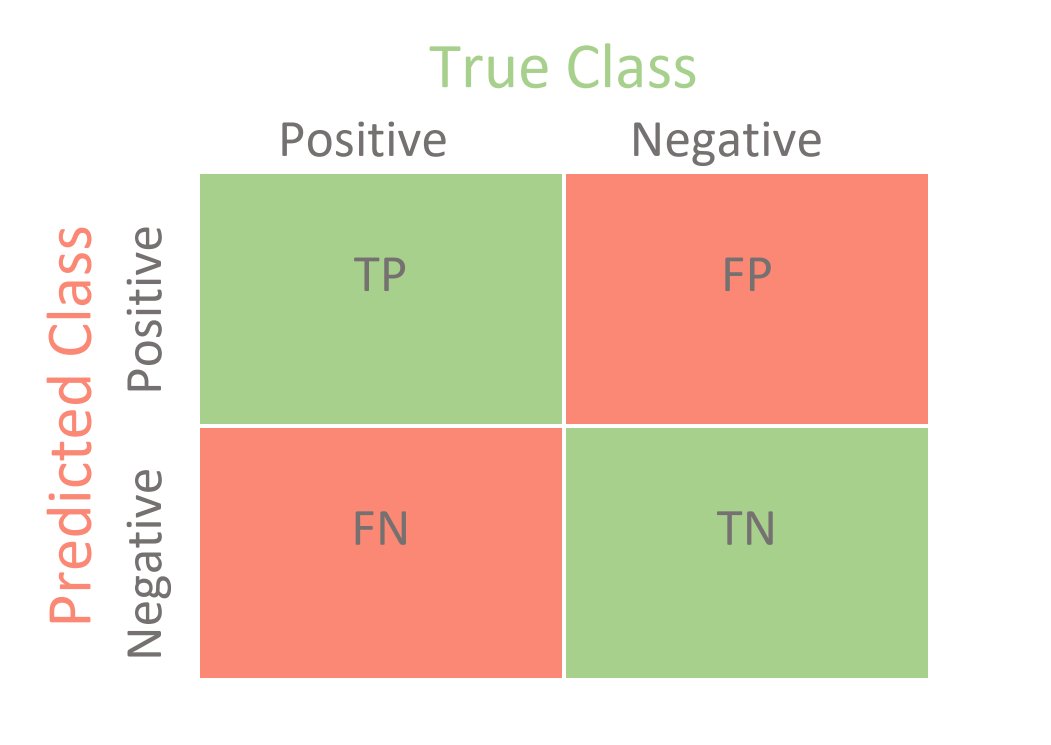

In [17]:
# let's make our confusion matrix colorful.

# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)
   # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ### Added: Rotate xticks for readability & increase font size (required due to such a large confusion matrix)
  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # Save the figure to the current working directory
  if savefig:
    fig.savefig("confusion_matrix.png")

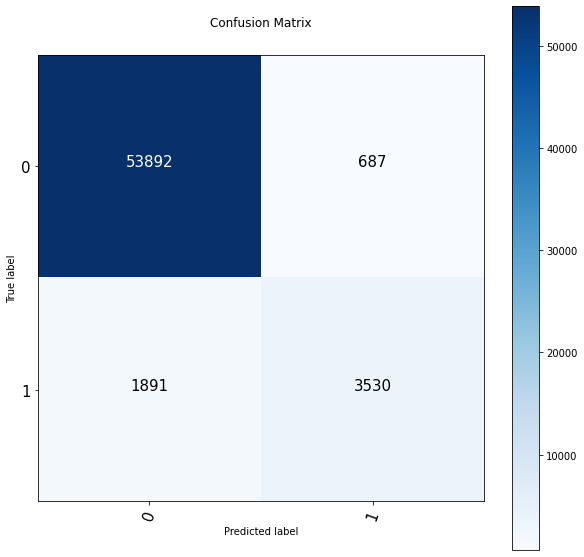

In [18]:
# let's call our function to plot confusion matrix.

make_confusion_matrix(y_train_5, y_train_pred)

#### 6.1.2 precision and recall tradeoff

* increasing precision decreased recall, unfortunately reduces recall, this is called `precision-recall tradeoff`.

* if someone says, 'let's reach 99 percent precision', you should ask, 'at what recall?'

* accuracy of the positive predictions is called precision

* accuracy of the false negatives is called recall

In [19]:
# let's see our precision and recall score

from sklearn.metrics import precision_score, recall_score

print(f"precision score is: {precision_score(y_train_5,y_train_pred)}\n")
print(f"recall score is: {recall_score(y_train_5,y_train_pred)}")

precision score is: 0.8370879772350012

recall score is: 0.6511713705958311


* f1-score is the harmonic mean of precision_score and recall_score

* $precision  =   \frac{tp} {fp+tp}$

* $recall = \frac{tp} {fn+tp}$

* $f1-score = \frac{2*precision*recall} {precision+recall}$

* $accuracy = \frac{tp+tn} {tp+fn+tn+fp}$

where,


1.   tp = true positive
2.   tn = true negative
3.   fp = false positive
4.   fn = false negative



In [20]:
from sklearn.metrics import f1_score

print(f"f1-score is: {f1_score(y_train_5,y_train_pred)}") 

f1-score is: 0.7325171197343846


In [21]:
# scikit learn does not allow us to change the threshold value by providing us with any parameter the predict function.
# we can use decision function instead and then set the threshold according to our needs.

y_score = sgd_clf.decision_function([some_digit])
y_score

array([2164.22030239])

In [22]:
threshold = 0
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([ True])

In [23]:
# now let's raise the threshold
threshold = 8000
y_some_digit_pred = (y_score > threshold)
y_some_digit_pred

array([False])

so our threshold value is between 0 and 8000 for sure!

**Question** -  when to decide what value of threshold to use?

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method = 'decision_function')
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [26]:
precisions, precisions.shape

(array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
        1.        ]), (59967,))

In [27]:
recalls, recalls.shape

(array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
        3.68935621e-04, 1.84467810e-04, 0.00000000e+00]), (59967,))

In [28]:
thresholds, thresholds.shape

(array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
          38871.26391927,   42216.05562787,   49441.43765905]), (59966,))

In [29]:
# now we will use matplotlib to plot our precision and recall vs threshold curve

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
  plt.plot(thresholds, precisions[:-1], 'b--', label='precision')
  plt.plot(thresholds, recalls[:-1], 'g-', label='recall')

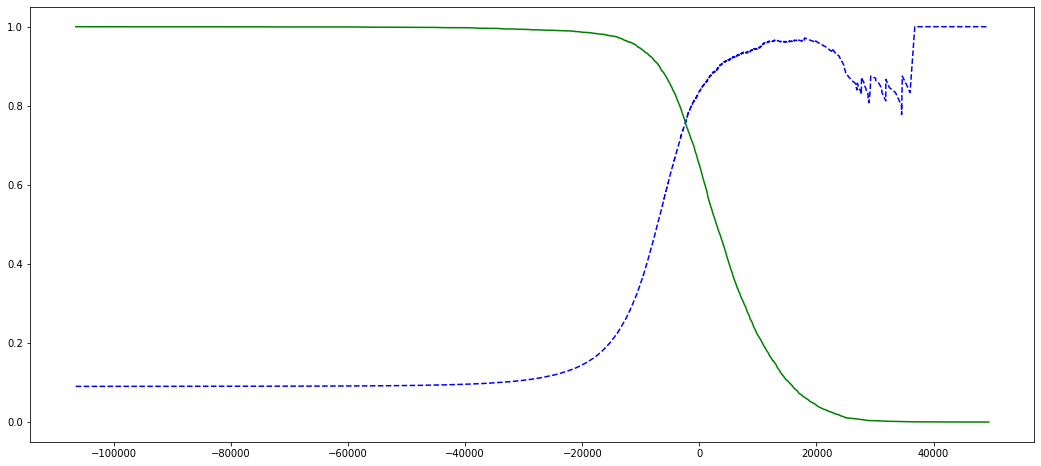

In [30]:
# let's call our funtion to plot our graph
plt.figure(figsize=(18,8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

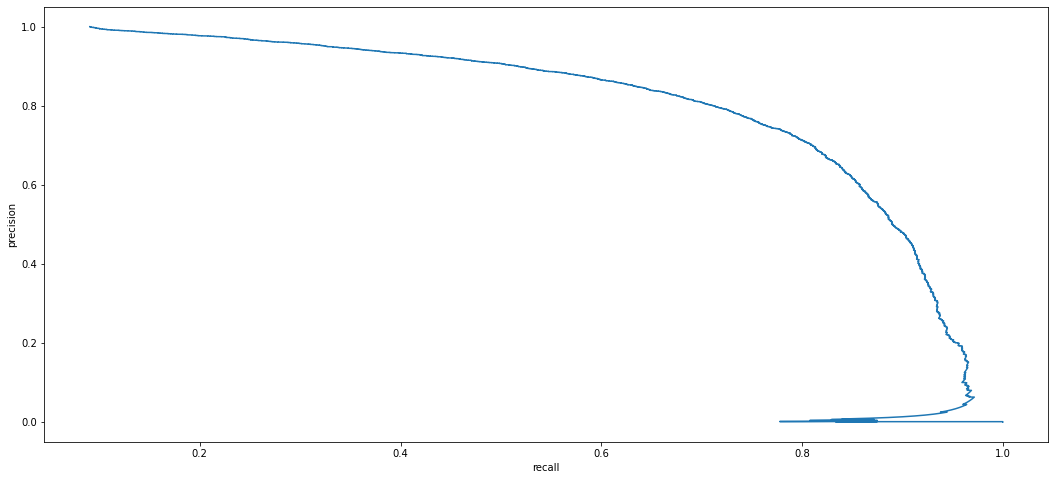

In [31]:
# now we will directly plot precisions against recalls

plt.figure(figsize=(18,8))
plt.plot(precisions, recalls)
plt.xlabel('recall')
plt.ylabel('precision')
plt.show() 

# it depends on one's project to whether he wants high precision or high recall value. you can't get both.
# just looking at the graph we can say, at around 80 percent of recall, precision value starts to drop drastically.
# we can choose value of recall around 60 percent to keep precision high too, else we would have to sacrifice one thing.

**if in case we aim for 90 percent precision?**

In [32]:
# now we will aim for 90 percent precision score
threshold_90_precision = thresholds[np.argmax(precisions>0.90)]
threshold_90_precision

3370.0194991439557

In [33]:
# now we will compare it with our original score 
y_train_pred_90 = (y_scores>= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [34]:
# now let's check precision score and recall score
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [35]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

so now, we can see above. when we aimed for very high precision value, we got low recall value. this is a tradeoff!

#### 6.1.3 The ROC Curve ( reciever operating characterstics )

In [36]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores) 

# fpr = false positive rate
# tpr = true positive rate

In [37]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
        -105763.22240074, -106527.45300471, -146348.56726174]))

In [38]:
# now we can plot fpr v/s tpr
def plot_roc_curve(fpr, tpr, label=None):
  plt.plot(fpr, tpr, linewidth=2, label=label)
  plt.plot([0,1], [0,1], 'k--')

**NOTE**

*  here also we can observe the tradeoff, lower is fpr, higher is tpr and vice versa
* higher the area under this roc curve, the more perfect the classifier is.

Text(0, 0.5, 'tpr')

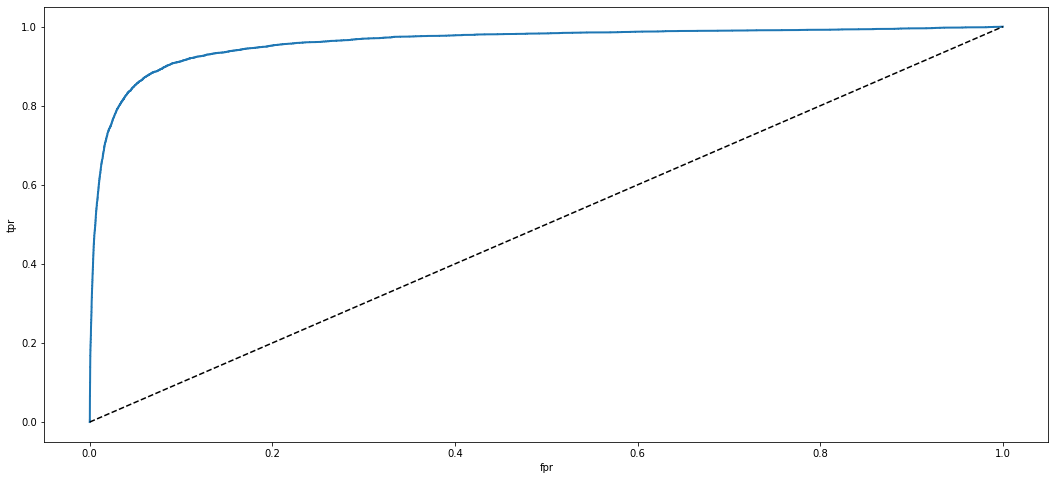

In [39]:
plt.figure(figsize=(18,8))
plot_roc_curve(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

**NOTE**

* we should use precision-recall curve whenever our positive class is rare.

In [40]:
# now let's calculate area under the curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [41]:
# now let's train our model on RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [42]:
y_probas_forest

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]])

In [43]:
y_scores_forest = y_probas_forest[:,1]
y_scores_forest

array([0.89, 0.01, 0.04, ..., 0.98, 0.08, 0.06])

In [44]:
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

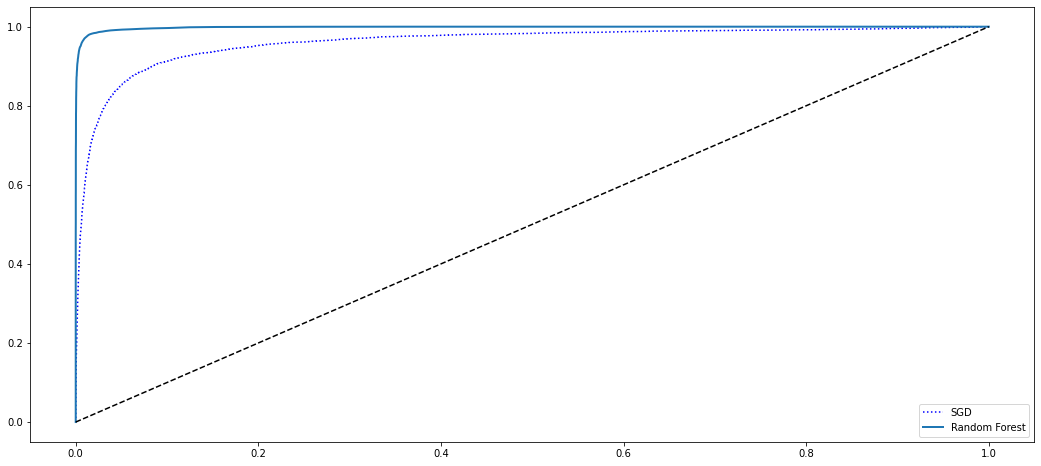

In [45]:
plt.figure(figsize=(18,8))
plt.plot(fpr,tpr,"b:", label='SGD')
plot_roc_curve(fpr_forest, tpr_forest, 'Random Forest')
plt.legend(loc='lower right')
plt.show()
# from this graph we can see the difference between both the classifiers.

In [46]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145

### 6.2 **MULTICLASS CLASSIFICATION**

In [47]:
# let's train our dataset on whole data with 10 different classes to classify.

from sklearn.ensemble import RandomForestClassifier
random_forest_clf = RandomForestClassifier(random_state=42)
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [49]:
# let's predict

y_pred = random_forest_clf.predict(X_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

<Figure size 1296x576 with 0 Axes>

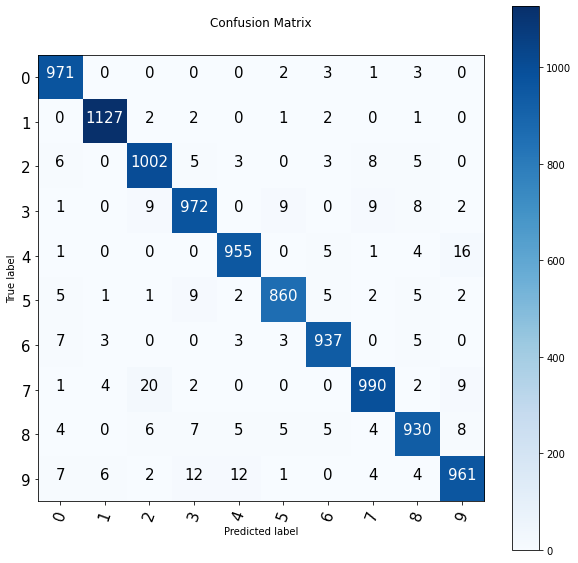

In [51]:
# plotting confusion matrix

make_confusion_matrix(y_test, y_pred)

In [53]:
# evaluating accuracy score of our model.

from sklearn.metrics import accuracy_score
print(f"accuracy score is : {accuracy_score(y_test,y_pred)}\n")

accuracy score is : 0.9705



#### 6.1.4 saving our model

In [58]:
# now, let's save our model so that it can be used later for predictions.

import pickle

# open a file where we will store our data
file = open("digit_recognizition_rf.pkl",'wb')

# dumping information into this file
pickle.dump(random_forest_clf, file)

In [59]:
# let's load our saved model for understanding purpose.

model = open('digit_recognizition_rf.pkl','rb')
forest = pickle.load(model)

In [61]:
y_prediction = forest.predict(X_test)
y_prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [62]:
# here we can see we got the same accuracy score which we got earlier. 
# so now, we have cross checked that our saved model is producing the same results even after we saved and loaded it back.

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.9705